<a href="https://colab.research.google.com/github/Rpon17/plant_lover/blob/main/%EC%9D%B4%EA%B1%B4%EC%A7%84%EC%A7%9C%EB%8C%80%EB%94%B0!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install firebase-admin

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')  # Google Drive 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

# JSON 키 파일 업로드
uploaded = files.upload()

Saving aaaa-8a6a5-firebase-adminsdk-1wmfe-37e91395c1.json to aaaa-8a6a5-firebase-adminsdk-1wmfe-37e91395c1.json


In [ ]:
import os

# 현재 디렉토리의 파일 목록 확인
print(os.listdir())  # 업로드된 파일 목록 출력

['.config', 'drive', 'aaaa-8a6a5-firebase-adminsdk-1wmfe-37e91395c1.json', 'aaaa-8a6a5-firebase-adminsdk-1wmfe-36195ee61a.json', 'sample_data']


In [ ]:
import firebase_admin

# 모든 앱을 삭제하는 방법
if len(firebase_admin._apps) > 0:
    apps_to_delete = list(firebase_admin._apps.values())  # 앱을 리스트에 저장

    # 리스트에서 모든 앱을 삭제
    for app in apps_to_delete:
        firebase_admin.delete_app(app)

    print("모든 Firebase 앱이 삭제되었습니다.")
else:
    print("삭제할 Firebase 앱이 없습니다.")


삭제할 Firebase 앱이 없습니다.


In [ ]:
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/aaaa-8a6a5-firebase-adminsdk-1wmfe-37e91395c1.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://aaaa-8a6a5-default-rtdb.firebaseio.com/',
        'storageBucket': 'aaaa-8a6a5.appspot.com'
    })
    print("Firebase 초기화 완료!")
else:
    print("Firebase는 이미 초기화되었습니다.")



Firebase 초기화 완료!


In [ ]:
import base64
from PIL import Image
from io import BytesIO

# Firebase에서 데이터 가져오기
from firebase_admin import db

Firebase에서 가져온 데이터: {'ESP32CAM': '', 'ESP32SENSOR': {'습도': '35.00%', '식물연결상태': '식물이랑 연결이 안되었습니다', '온도': '24.40°C', '조도': '500.83 lux', '토양습도': '8%'}, '식물 건강 상태': 'None'}
데이터를 성공적으로 가져왔습니다.
이미지가 저장되었습니다: decoded_disease_image.jpg

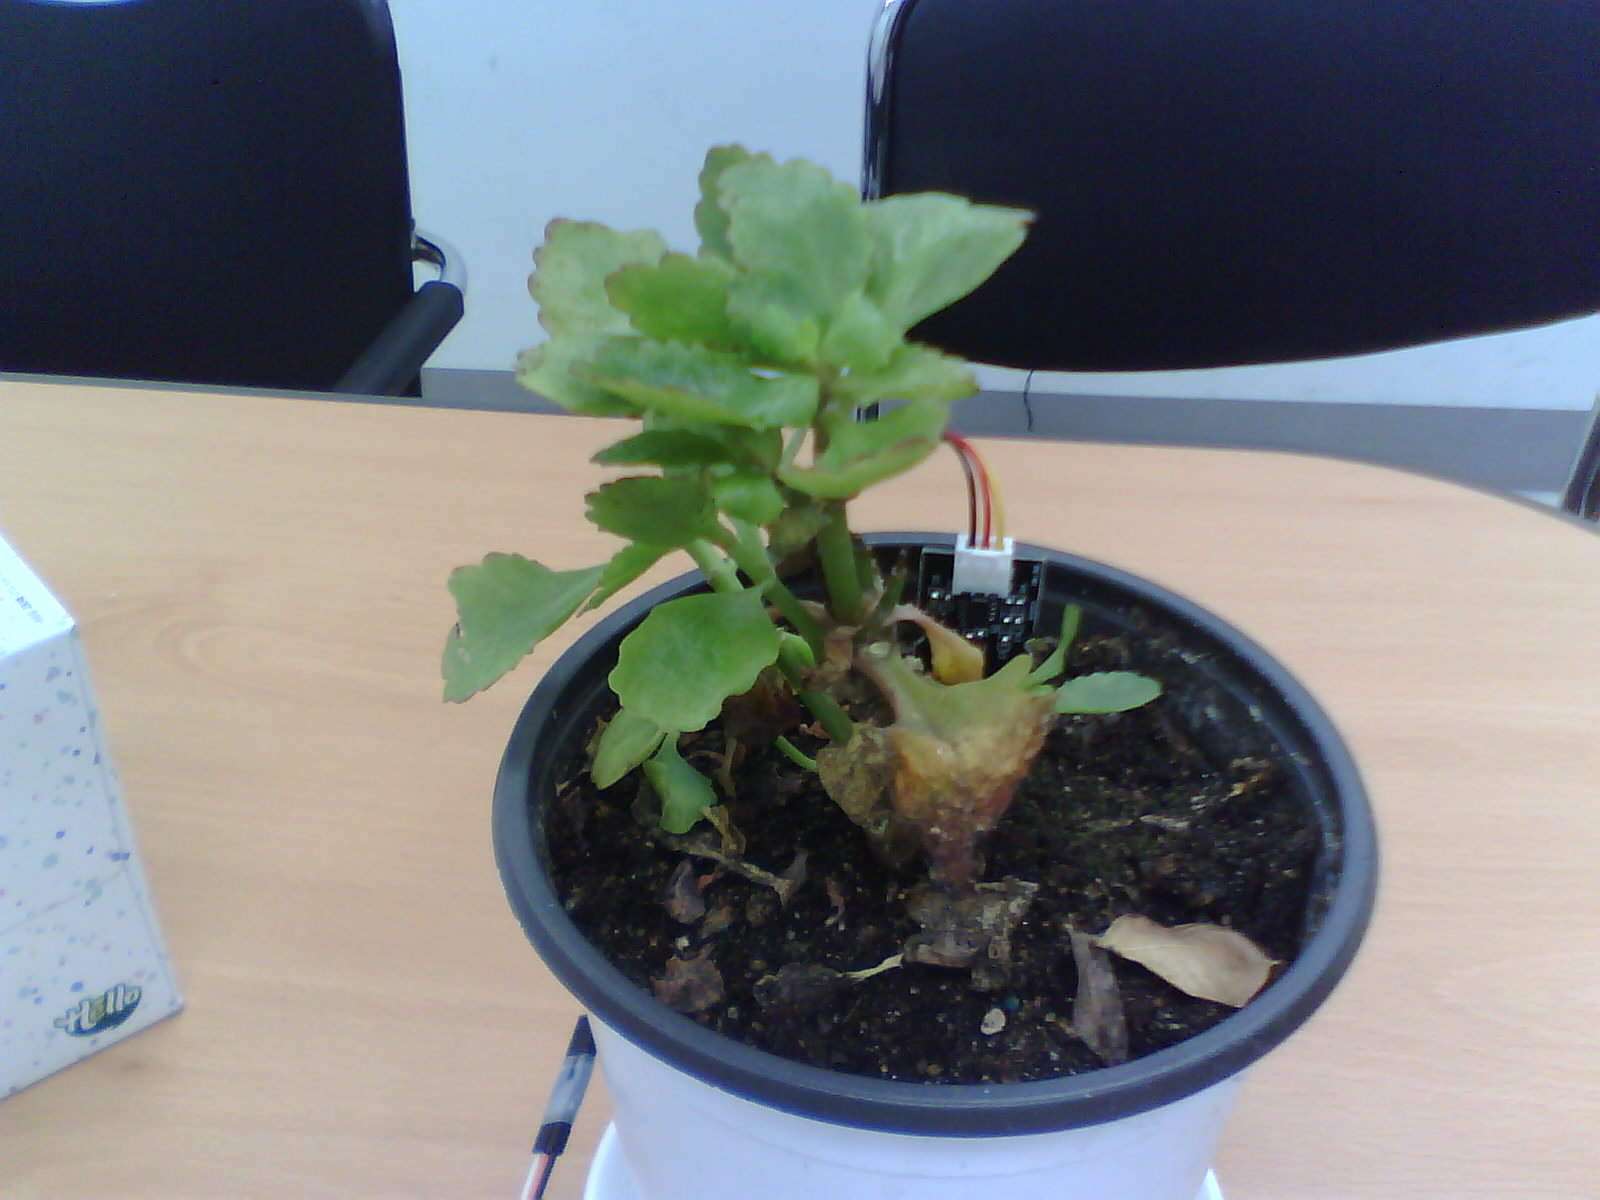

In [ ]:
import base64
from firebase_admin import db
from PIL import Image
from io import BytesIO

# Firebase에서 데이터 가져오기
ref = db.reference('JSON')  # Firebase에서 정확한 경로 설정
data = ref.get()  # Firebase에서 데이터를 가져옴

# 데이터 확인
if data:
    print("Firebase에서 가져온 데이터:", data)

    # disease_image 데이터를 가져오기
    image_data = data.get('ESP32CAM', None)

    if image_data:
        print("데이터를 성공적으로 가져왔습니다.")

        # Base64 디코딩 및 저장
        try:
            # "data:image/jpeg;base64," 헤더가 없다면, 추가해서 디코딩
            if "data:image" in image_data:
                image_bytes = base64.b64decode(image_data.split(",")[1])
            else:
                # 접두사 없는 경우, 그냥 Base64 디코딩
                image_data = "data:image/jpeg;base64," + image_data  # 접두사 추가
                image_bytes = base64.b64decode(image_data.split(",")[1])

            # 디코딩된 이미지를 파일로 저장
            image = Image.open(BytesIO(image_bytes))
            image_path = "decoded_disease_image.jpg"
            image.save(image_path)
            print(f"이미지가 저장되었습니다: {image_path}")
        except Exception as e:
            print("이미지 디코딩 중 오류 발생:", e)
    else:
        print("disease_image 키가 존재하지 않거나 데이터가 없습니다.")
else:
    print("Firebase에서 데이터를 가져오지 못했습니다.")



In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gcloud --version

Google Cloud SDK 501.0.0


In [ ]:
from google.cloud import storage

# Google Cloud Storage 클라이언트 초기화
client = storage.Client()

# Google Cloud Storage 설정
bucket_name = "one_key_one_project"  # Google Cloud Storage 버킷 이름
destination_blob_name = "path/to/best.pt"  # 업로드할 경로
source_file_name = "/content/drive/MyDrive/best.pt"  # Google Drive에서 파일 경로

# Google Cloud Storage에 파일 업로드
bucket = client.bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_filename(source_file_name)

print(f"파일이 Google Cloud Storage에 업로드되었습니다: {destination_blob_name}")

파일이 Google Cloud Storage에 업로드되었습니다: path/to/best.pt


In [ ]:


from google.cloud import storage

# Google Cloud Storage 클라이언트 초기화
client = storage.Client()

# Google Cloud Storage 설정
bucket_name = "one_key_one_project"  # Google Cloud Storage 버킷 이름
source_blob_name = "path/to/best.pt"  # Google Cloud Storage에 저장된 파일 경로
destination_file_name = "best.pt"  # Colab 환경에 저장할 파일명

# 모델 파일 다운로드
bucket = client.bucket(bucket_name)
blob = bucket.blob(source_blob_name)
blob.download_to_filename(destination_file_name)

print(f"YOLO 모델이 다운로드되었습니다: {destination_file_name}")

YOLO 모델이 다운로드되었습니다: best.pt


In [ ]:
#이게 리얼 healthy unhaelthy 분류

import torch
import base64
from firebase_admin import db
from PIL import Image
from io import BytesIO
import os
import matplotlib.pyplot as plt

# YOLO 모델 로드
model_path = "best.pt"  # 다운로드한 YOLO 모델 경로
image_path = "decoded_disease_image.jpg"  # Firebase에서 저장한 이미지 경로

# YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# 이미지 분석
results = model(image_path)

# 결과 라벨 추출
df_results = results.pandas().xyxy[0]  # 감지된 객체의 결과 DataFrame

# 'unhealthy' 라벨만 필터링
unhealthy_results = df_results[df_results['name'] == 'unhealthy']

# 결과 라벨 출력
labels = df_results['name'].tolist()
print("YOLO 모델 분석 결과 라벨:", labels)

# Healthy/Unhealthy 판단 및 결과 저장
ref = db.reference('leaf_disease/YOLO')  # Firebase 경로 설정

# 'Unhealthy'가 감지되었는지 판단하기 위해 labels 목록에서 체크
if 'Unhealthy' in labels:
    print("Unhealthy한 잎이 감지되었습니다.")

    # Step 6: 결과 시각화 및 저장
    img = Image.open(image_path).convert("RGB")  # RGB로 변환
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    # 바운딩 박스 그리기 (unhealthy 클래스만)
    for _, row in unhealthy_results.iterrows():
        x_min, y_min, x_max, y_max = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min - 10, 'Unhealthy', color='red', fontsize=12, weight='bold')

    plt.axis('off')

    # 결과 이미지 경로 설정
    output_image_path = '/content/decoded_image3.jpg'
    plt.savefig(output_image_path)
    print(f"탐지된 결과 이미지가 저장되었습니다: {output_image_path}")

    # 이미지를 Base64로 인코딩하여 Firebase에 업로드
    def encode_image_to_base64(image_path):
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            return f"data:image/jpeg;base64,{encoded_string}"

    encoded_image = encode_image_to_base64(output_image_path)
    ref.child('unhealthy').set({
        'image': encoded_image,
        'status': 'unhealthy'
    })
    print("Unhealthy 데이터가 Firebase Realtime Database에 업로드되었습니다.")

    # Step 7: 바운딩 박스 영역만 잘라내서 Firebase에 업로드하기
    unhealthy_crop_dir = '/content/unhealthy_crops/'
    os.makedirs(unhealthy_crop_dir, exist_ok=True)

    for idx, row in unhealthy_results.iterrows():
        x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cropped_img = img.crop((x_min, y_min, x_max, y_max)).convert("RGB")
        cropped_img_path = os.path.join(unhealthy_crop_dir, f'unhealthy_crop_{idx}.jpg')
        cropped_img.save(cropped_img_path)
        print(f"바운딩 박스 영역이 잘린 이미지가 저장되었습니다: {cropped_img_path}")

        # 바운딩 박스 영역을 Base64로 인코딩하여 Firebase에 업로드
        encoded_cropped_image = encode_image_to_base64(cropped_img_path)
        ref.child(f'unhealthy_crop_{idx}').set({
            'image': encoded_cropped_image,
            'status': 'unhealthy'
        })
        print(f"Unhealthy 바운딩 박스 영역이 Firebase Realtime Database에 업로드되었습니다: unhealthy_crop_{idx}")

else:  # 'Unhealthy' 라벨이 없는 경우에만 Healthy로 판단
    print("Healthy한 잎만 감지되었습니다.")
    # Healthy 상태로 전체 이미지를 Firebase에 업로드
    def encode_image_to_base64(image_path):
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            return f"data:image/jpeg;base64,{encoded_string}"

    encoded_image = encode_image_to_base64(image_path)
    ref.child('healthy').set({
        'image': encoded_image,
        'status': 'healthy'
    })
    print("Healthy 데이터가 Firebase Realtime Database에 업로드되었습니다.")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-20 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLO 모델 분석 결과 라벨: ['Unhealthy']
Unhealthy한 잎이 감지되었습니다.
탐지된 결과 이미지가 저장되었습니다: /content/decoded_image3.jpg
Unhealthy 데이터가 Firebase Realtime Database에 업로드되었습니다.


In [ ]:
#firebase data로 아픈놈 추리기

import torch
from PIL import Image
import os

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# YOLO 모델 로드
model_path = "best.pt"  # 다운로드한 YOLO 모델 경로
image_path = "decoded_disease_image.jpg"  # 분석할 이미지 경로

# YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# 이미지 분석
results = model(image_path)

# 결과 라벨 추출
df_results = results.pandas().xyxy[0]  # 감지된 객체의 결과 DataFrame

# 'unhealthy' 라벨만 필터링
unhealthy_results = df_results[df_results['name'].str.lower() == 'unhealthy']

# 결과 라벨 출력
labels = [label.lower() for label in df_results['name'].tolist()]
print("YOLO 모델 분석 결과 라벨:", labels)

# 'Unhealthy'가 감지되었는지 판단하기 위해 labels 목록에서 체크
if 'unhealthy' in labels:
    print("Unhealthy한 잎이 감지되었습니다.")

    # 원본 이미지 로드
    img = Image.open(image_path).convert("RGB")

    # 바운딩 박스 영역 중 첫 번째 영역만 잘라내어 저장하기
    if not unhealthy_results.empty:
        # 첫 번째 'unhealthy' 영역 선택
        first_unhealthy_result = unhealthy_results.iloc[0]
        x_min, y_min, x_max, y_max = int(first_unhealthy_result['xmin']), int(first_unhealthy_result['ymin']), int(first_unhealthy_result['xmax']), int(first_unhealthy_result['ymax'])

        # 이미지 크롭 (바운딩 박스 영역만)
        cropped_img = img.crop((x_min, y_min, x_max, y_max)).convert("RGB")
        unhealthy_plant_dir = '/content/drive/MyDrive/plants/unhealthy'
        os.makedirs(unhealthy_plant_dir, exist_ok=True)  # 폴더가 없으면 생성
        unhealthy_plant_path = os.path.join(unhealthy_plant_dir, 'unhealthy_plant.jpg')  # Google Drive에 저장할 파일 경로
        cropped_img.save(unhealthy_plant_path)

        print(f"Unhealthy 바운딩 박스 영역이 잘린 이미지가 Google Drive에 저장되었습니다: {unhealthy_plant_path}")

else:
    print("Healthy한 잎만 감지되었습니다.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-20 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLO 모델 분석 결과 라벨: ['healthy', 'healthy', 'healthy', 'unhealthy']
Unhealthy한 잎이 감지되었습니다.
Unhealthy 바운딩 박스 영역이 잘린 이미지가 Google Drive에 저장되었습니다: /content/drive/MyDrive/plants/unhealthy/unhealthy_plant.jpg


In [ ]:
#goodle drive data로 아픈놈 추리기

import torch
from PIL import Image
import os

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# YOLO 모델 로드
model_path = "best.pt"  # 다운로드한 YOLO 모델 경로
image_path = "/content/drive/MyDrive/plants/plants/unhealthy_plant5.jpg"  # 분석할 이미지 경로

# YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# 이미지 분석
results = model(image_path)

# 결과 라벨 추출
df_results = results.pandas().xyxy[0]  # 감지된 객체의 결과 DataFrame

# 'unhealthy' 라벨만 필터링
unhealthy_results = df_results[df_results['name'].str.lower() == 'unhealthy']

# 결과 라벨 출력
labels = [label.lower() for label in df_results['name'].tolist()]
print("YOLO 모델 분석 결과 라벨:", labels)

# 'Unhealthy'가 감지되었는지 판단하기 위해 labels 목록에서 체크
if 'unhealthy' in labels:
    print("Unhealthy한 잎이 감지되었습니다.")

    # 원본 이미지 로드
    img = Image.open(image_path).convert("RGB")

    # 바운딩 박스 영역 중 첫 번째 영역만 잘라내어 저장하기
    if not unhealthy_results.empty:
        # 첫 번째 'unhealthy' 영역 선택
        first_unhealthy_result = unhealthy_results.iloc[0]
        x_min, y_min, x_max, y_max = int(first_unhealthy_result['xmin']), int(first_unhealthy_result['ymin']), int(first_unhealthy_result['xmax']), int(first_unhealthy_result['ymax'])

        # 이미지 크롭 (바운딩 박스 영역만)
        cropped_img = img.crop((x_min, y_min, x_max, y_max)).convert("RGB")
        unhealthy_plant_dir = '/content/drive/MyDrive/plants/unhealthy'
        os.makedirs(unhealthy_plant_dir, exist_ok=True)  # 폴더가 없으면 생성
        unhealthy_plant_path = os.path.join(unhealthy_plant_dir, 'unhealthy_plant5.jpg')  # Google Drive에 저장할 파일 경로
        cropped_img.save(unhealthy_plant_path)

        print(f"Unhealthy 바운딩 박스 영역이 잘린 이미지가 Google Drive에 저장되었습니다: {unhealthy_plant_path}")

else:
    print("Healthy한 잎만 감지되었습니다.")

    # Firebase Realtime Database에서 경로 설정
    ref = db.reference('JSON/식물 건강 상태')

    # '식물 건강 상태'를 "healthy"로 변경
    ref.set("Healthy")

    # 업데이트 확인을 위해 데이터 읽기
    updated_value = ref.get()
    print(f"업데이트된 식물 건강 상태: {updated_value}")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-20 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


YOLO 모델 분석 결과 라벨: ['unhealthy']
Unhealthy한 잎이 감지되었습니다.
Unhealthy 바운딩 박스 영역이 잘린 이미지가 Google Drive에 저장되었습니다: /content/drive/MyDrive/plants/unhealthy/unhealthy_plant5.jpg
